# Leveraging Data-Driven Insights to Uncover Value in the Indian Ecosystem


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

#### Scenario
Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action. Analyse funding received by start-ups in India from 2018 to 2021.Separate data for each year of funding will be provided.In these datasets, you'll find the start-ups’ details, the funding amounts received, and the investors' information.

#### Objective
The primary objective is to analyse the funding landscape for start-ups in India from 2018 to 2021, focusing on identifying key trends and patterns. This analysis will provide crucial insights into the Indian start-up ecosystem, which will guide strategic decisions for entering and navigating the market effectively. By understanding how funding levels have changed annually, the analysis aims to assess the growth and stability of the ecosystem over time.


#### Key Insights
A significant part of the analysis involves examining sector-specific investment trends. By identifying which sectors, such as technology, healthcare, and fintech, received the most funding each year, the study will highlight high-growth areas and potential sectors for strategic investments or partnerships. This sectoral analysis will help pinpoint where the most promising opportunities lie within the Indian start-up landscape.
Another critical aspect is the distribution of funding across different stages, such as seed, series A, and series B. Understanding the trends and concentrations of funding at various stages will provide insights into the maturity levels of start-ups that attract the most capital. This information is essential for targeting the appropriate stages for entry and investment, ensuring alignment with market dynamics.

Geographical trends will also be explored to identify hotspots for start-up funding across different regions and cities in India. Mapping the geographic distribution of funding will reveal regions with robust start-up activities and strong investor presence. This geographic analysis will assist in focusing efforts on areas that offer the most significant potential for growth and collaboration.

Finally, the analysis will investigate the most active investors, both domestic and international, to understand their investment patterns and influence in the market. Recognizing key investors and their contributions will help build strategic relationships and identify potential sources of capital. Furthermore, the study will evaluate the success rates of funded start-ups, providing insights into the effectiveness of initial investments and highlighting promising start-ups. By correlating funding trends with macroeconomic indicators and significant events, the analysis will offer a comprehensive context for strategic planning and decision-making.

#### Approach
In conclusion, to understand the trends and patterns in start-up funding in India from 2018 to 2021, a comprehensive approach will be implemented. This will involve gathering detailed data on start-ups, funding amounts, stages, sectors, geographic locations, and investors. The collected data will be analyzed using descriptive statistics, trend analysis, visualizations, and statistical tests to derive key insights. These insights will be compiled into detailed reports and dashboards, providing actionable information and strategic recommendations. Ultimately, this analysis will offer data-driven guidance on the most promising sectors, regions, and funding stages to focus on, identify key investors for potential partnerships, and assess the overall attractiveness of the Indian start-up market for strategic entry.



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/female |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.

### Load Data

This dataset is in titanic-231005-181053.csv. Make sure the file is in the current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Configuring Matplotlib to display plots inline within the Jupyter Notebook or JupyterLab environment
%matplotlib inline

In [2]:
# Read the Titanic dataset from a CSV file 
df_titanic = pd.read_csv("titanic-231005-181053.csv")

# Display the first few rows of the DataFrame
print()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task 1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [3]:
# Display verbose summary information about the DataFrame
print()
df_titanic.info(memory_usage = "deep")
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 363.0 KB



##### Task 2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [4]:
# Removing the dollar sign from the "Fare" column and then converting the result to float data type.
df_titanic["Fare"] = df_titanic["Fare"].str.replace('$', "").astype(float)

# Display verbose summary information about the modified DataFrame
print()
df_titanic.info(memory_usage = "deep")

# # Display the first few rows of the modified DataFrame
print()
df_titanic.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Task 3: Check out statistics of Numeric Columns

Hint: describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [5]:
# Display the transpose of the descriptive statistics summary of the DataFrame
print()
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analyse Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.


*********  A BARPLOT TO COMPARE THE NUMBER OF PASSENGERS THAT PERISHED AGAINST PASSENGERS THAT SURVIVED  *********



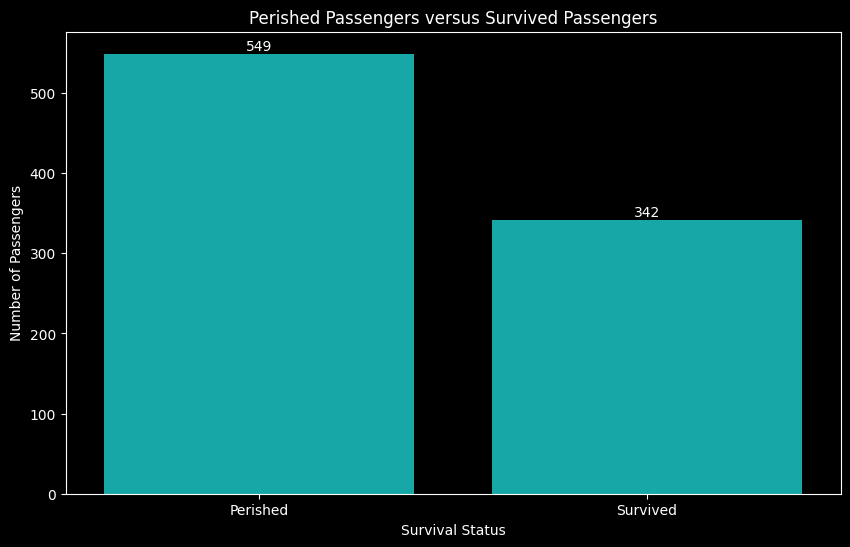


Observation:

         The bar plot indicates a significant proportion of passengers on the Titanic perished.
      



In [6]:
# Dictionary mapping survival status code to labels
sur_inact_map = {0: "Perished", 1: "Survived"}

# Initialize a new column for survival status label with NaN values
df_titanic["Survived_label"] = np.nan

# Fill NaN values in the "Survived_label" column based on the "Survived" column using the mapping dictionary
df_titanic["Survived_label"] = df_titanic["Survived_label"].fillna(df_titanic["Survived"].map(sur_inact_map))

# Group the data by survival status label and count the number of passengers in each group
sur_per = df_titanic.groupby("Survived_label")["PassengerId"].count().reset_index()

# Set the style of the plot to a dark background
plt.style.use("dark_background")

# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to compare the number of passengers that perished against passengers that survived
sns.barplot(data=sur_per, x="Survived_label", y="PassengerId", color="c")

# Set labels for the x-axis and y-axis
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")

# Set the title of the plot
plt.title("Perished Passengers versus Survived Passengers")

# Annotate each bar with its corresponding value
for index, row in sur_per.iterrows():
    # Place the annotation on top of each bar, aligned to the center
    plt.text(index, row["PassengerId"], str(row["PassengerId"]), ha="center", va="bottom")

# Print a message indicating the purpose of the plot
print()
print("*********  A BARPLOT TO COMPARE THE NUMBER OF PASSENGERS THAT PERISHED AGAINST PASSENGERS THAT SURVIVED  *********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the bar plot
print()
print("Observation:")
print("""
         The bar plot indicates a significant proportion of passengers on the Titanic perished.
      """)
print()

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task 5: Plot Bar Chart on Number of Male and Female Passengers


**********  A BARPLOT TO COMPARE THE NUMBER OF MALE PASSENGERS TO FEMALE PASSENGERS  **********



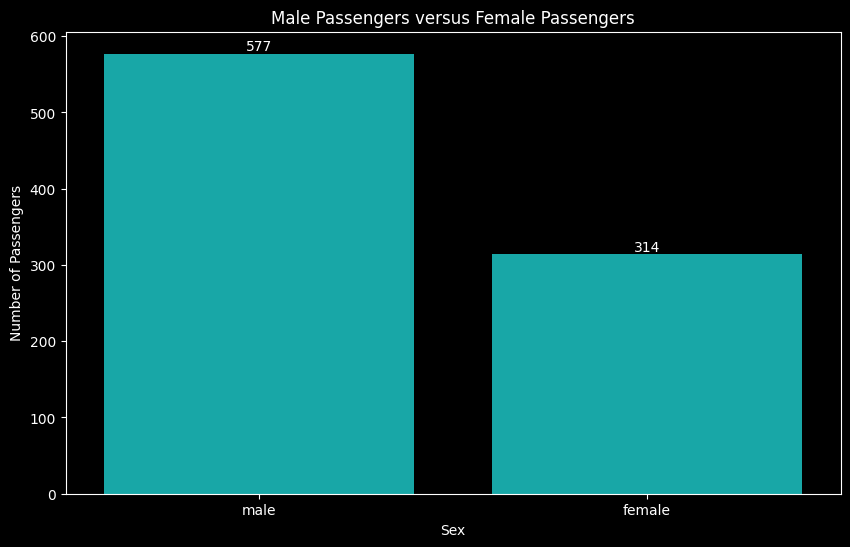


Observation:

         The bar plot indicates more passengers on the Titanic were male.
      
The number of male and female passengers on the Titanic were:



,Sex,PassengerId
0,female,314
1,male,577


In [7]:
# Group the data by gender and count the number of passengers in each group
gender = df_titanic.groupby("Sex")["PassengerId"].count().reset_index()

# Set the style of the plot to a dark background
plt.style.use("dark_background")

# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a countplot to compare the number of male passengers to female passengers
ax = sns.countplot(data=df_titanic, x="Sex", color="c")

# Set labels for the x-axis and y-axis
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")

# Set the title of the plot
plt.title("Male Passengers versus Female Passengers")

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")

# Print a message indicating the purpose of the plot
print()
print("**********  A BARPLOT TO COMPARE THE NUMBER OF MALE PASSENGERS TO FEMALE PASSENGERS  **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the bar plot
print()
print("Observation:")
print("""
         The bar plot indicates more passengers on the Titanic were male.
      """)
print("The number of male and female passengers on the Titanic were:")
print()
gender

##### Task 6: Groupby Sex to Find Survival Rate of Male and Female

In [8]:
# Group by 'Sex' and calculate the total number of passengers and the number of survivors
survival_rate_sex = df_titanic.groupby("Sex").agg({"Survived": ["sum", "count"]})

# Calculate survival rate by dividing the number of survivors by the total number of passengers for each sex
survival_rate_sex["Survival_rate/gender"] = survival_rate_sex[("Survived", "sum")] / survival_rate_sex[("Survived", "count")] * 100

# Calculate total number of passengers
total_passengers = gender["PassengerId"].sum()

# Calculate survival rate overall by dividing the total number of survivors by the total number of passengers
survival_rate_sex["Survival_rate_overall"] = survival_rate_sex[("Survived", "sum")] / total_passengers * 100

# Reset index for better presentation
survival_rate_sex.reset_index(inplace=True)

# Make a copy of the survival rate DataFrame for formatting
survival_rate_sex_formatted = survival_rate_sex.copy()

# Format the survival rate to display as a percentage with two decimal places
survival_rate_sex_formatted["Survival_rate/gender"] = survival_rate_sex_formatted["Survival_rate/gender"].apply(lambda x: "{:.2f}%".format(x))
survival_rate_sex_formatted["Survival_rate_overall"] = survival_rate_sex_formatted["Survival_rate_overall"].apply(lambda x: "{:.2f}%".format(x))

# Print the survival rate of each sex on the Titanic
print()
print("The survival rate of each sex on the Titanic is:")
print()
survival_rate_sex_formatted


The survival rate of each sex on the Titanic is:



Sex Survived       Survival_rate/gender Survival_rate_overall
               sum count                                           
0  female      233   314               74.20%                26.15%
1    male      109   577               18.89%                12.23%

##### Task 7: Plot Perished vs. Survived Bar for Male and Female
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.


**********  A BARPLOT TO SHOW THE SURVIVAL STATUS OF PASSENGERS BASED ON GENDER  **********



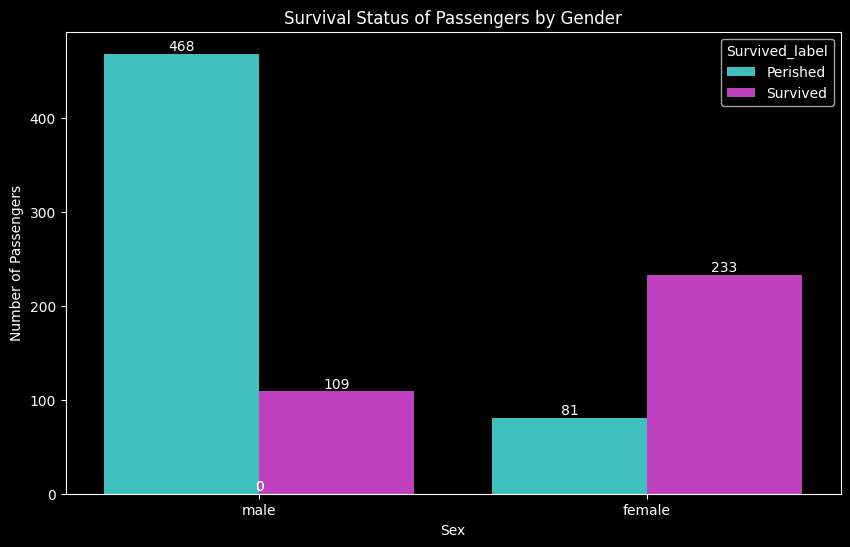


Observation:

         The bar plot indicates the majority of women survived while the vast majority of men perished.
      


In [9]:
# Define the custom palette
custom_palette = ["cyan", "magenta"]

# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a countplot with hue and custom palette
ax = sns.countplot(data=df_titanic, x="Sex", hue="Survived_label", palette=custom_palette, saturation=0.5)

# Set labels for the x-axis and y-axis
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")

# Set the title of the plot
plt.title("Survival Status of Passengers by Gender")

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")

# Print a message indicating the purpose of the plot
print()
print("**********  A BARPLOT TO SHOW THE SURVIVAL STATUS OF PASSENGERS BASED ON GENDER  **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the bar plot
print()
print("Observation:")
print("""
         The bar plot indicates the majority of women survived while the vast majority of men perished.
      """)

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [10]:
# Dictionary mapping ticket class code to labels
pcl_inact_map = {1: "Upper", 2: "Middle", 3: "Lower"}

# Initialize a new column for ticket class label with NaN values
df_titanic["Pclass_label"] = np.nan

# Fill NaN values in the "Pclass_label" column based on the "Pclass" column using the mapping dictionary
df_titanic["Pclass_label"] = df_titanic["Pclass_label"].fillna(df_titanic["Pclass"].map(pcl_inact_map))

# Group by 'Pclass_label' and calculate the total number of passengers and the number of survivors
survival_rate_pclass = df_titanic.groupby("Pclass_label").agg({"Survived": ["sum", "count"]})

# Calculate survival rate by dividing the number of survivors by the total number of passengers for each ticket class
survival_rate_pclass["Survival_rate/pclass"] = survival_rate_pclass[("Survived", "sum")] / survival_rate_pclass[("Survived", "count")] * 100

# Calculate overall survival rate for each ticket class
survival_rate_pclass["Survival_rate_overall"] = survival_rate_pclass[("Survived", "sum")] / total_passengers * 100

# Reset index for better presentation
survival_rate_pclass.reset_index(inplace=True)

# Make a copy of the survival rate Data Frame for formatting
survival_rate_pclass_formatted = survival_rate_pclass.copy()

# Format the survival rate to display as a percentage with two decimal places
survival_rate_pclass_formatted["Survival_rate/pclass"] = survival_rate_pclass_formatted["Survival_rate/pclass"].apply(lambda x: "{:.2f}%".format(x))
survival_rate_pclass_formatted["Survival_rate_overall"] = survival_rate_pclass_formatted["Survival_rate_overall"].apply(lambda x: "{:.2f}%".format(x))

# Print the survival rate of each ticket class on the Titanic
print()
print("The survival rate of each ticket class on the Titanic is:")
print()
survival_rate_pclass_formatted


The survival rate of each ticket class on the Titanic is:



Pclass_label Survived       Survival_rate/pclass Survival_rate_overall
                    sum count                                           
0        Lower      119   491               24.24%                13.36%
1       Middle       87   184               47.28%                 9.76%
2        Upper      136   216               62.96%                15.26%

##### Task 9: Plot Perished vs. Survived for each Pclass


**********  A BARPLOT TO SHOW THE SURVIVAL STATUS OF PASSENGERS BASED ON TICKET CLASS  **********



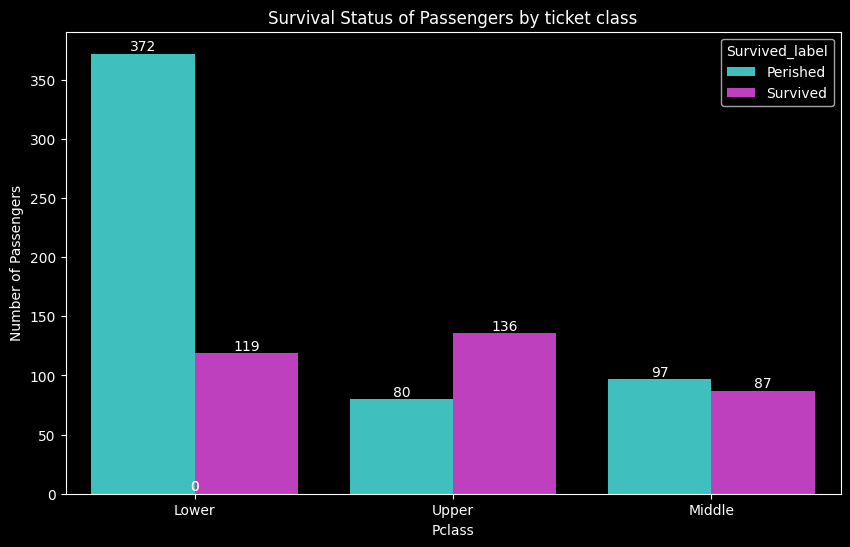


Observation:

         Passengers in the upper class had the highest survival rate both per class
         
         and contributed significantly to the overall survival rate. Conversely,
         
         passengers in the lower class had the lowest survival rate per class
         
         and also made a substantial contribution to the overall survival rate.

         The Middle class contributed the least to the overall survival rate.
      


In [11]:
# Define the custom palette
custom_palette = ["cyan", "magenta"]

# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a countplot with hue and custom palette
ax = sns.countplot(data=df_titanic, x="Pclass_label", hue='Survived_label', palette=custom_palette, saturation=0.5)

# Set labels for the x-axis and y-axis
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")

# Set the title of the plot
plt.title("Survival Status of Passengers by ticket class")

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")

# Print a message indicating the purpose of the plot
print()
print("**********  A BARPLOT TO SHOW THE SURVIVAL STATUS OF PASSENGERS BASED ON TICKET CLASS  **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the histogram
print()
print("Observation:")
print("""
         Passengers in the upper class had the highest survival rate both per class
         
         and contributed significantly to the overall survival rate. Conversely,
         
         passengers in the lower class had the lowest survival rate per class
         
         and also made a substantial contribution to the overall survival rate.

         The Middle class contributed the least to the overall survival rate.
      """)

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.


**********  A HISTOGRAM TO SHOW THE DISTRIBUTION OF PASSENGER AGES  **********



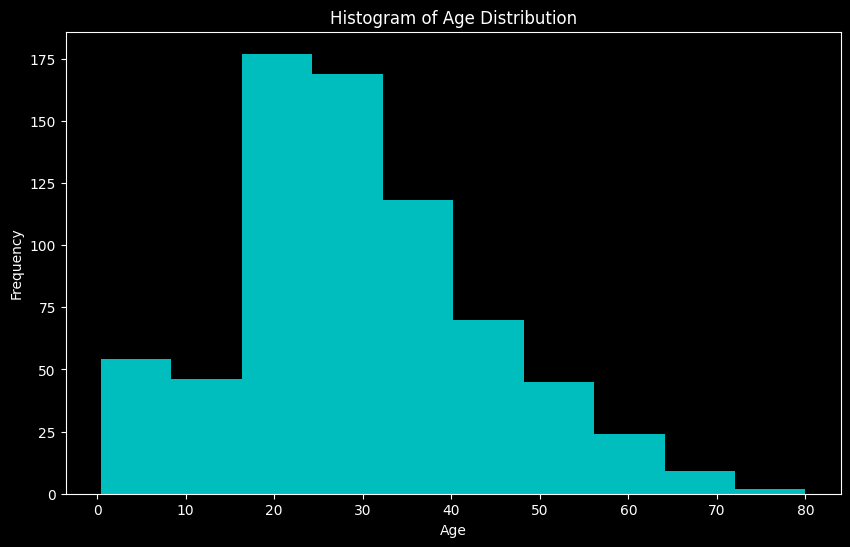


Summary statistics for the 'Age' column:

mean                   29.699118
std                    14.526497
min                     0.420000
max                    80.000000
median                 28.000000
mode                   24.000000
25th percentile        20.125000
75th percentile        38.000000
Interquartile Range    17.875000
kurtosis                0.178274
skewness                0.389108
Name: Age, dtype: float64

Observation:

         The histogram shows a relatively symmetrical distribution of passenger ages, 
         
         with relatively more younger passengers compared to older passengers.
      


In [12]:
# Extracting the "Age" column from the DataFrame
data = df_titanic["Age"]

# Calculate summary statistics for the "Age" column
summary_stats = data.agg(["mean", "std", "min", "max", "median"])

# Calculate the mode of the "Age" column
mode_value = data.mode().iloc[0]

# Append the mode value to the summary statistics DataFrame
summary_stats.loc["mode"] = mode_value

# Calculate quartiles
quartiles = data.quantile([0.25, 0.75])

# Append quartiles to the summary statistics DataFrame
summary_stats.loc["25th percentile"] = quartiles.loc[0.25]
summary_stats.loc["75th percentile"] = quartiles.loc[0.75]

# Calculate the interquartile range (IQR)
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]

# Append the interquartile range to the summary statistics DataFrame
summary_stats.loc["Interquartile Range"] = IQR

# Calculate the kurtosis for the "Age" column
data_kurtosis = data.kurtosis()

# Append the kurtosis value to the summary statistics DataFrame
summary_stats.loc["kurtosis"] = data_kurtosis

# Calculate the skewness for the "Age" column
data_skewness = data.skew()

# Append the skewness value to the summary statistics DataFrame
summary_stats.loc["skewness"] = data_skewness

# Plotting the histogram
data.hist(color="cyan", alpha=0.75, figsize=(10, 6), grid=False)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution")

# Print a message indicating the purpose of the plot
print()
print("**********  A HISTOGRAM TO SHOW THE DISTRIBUTION OF PASSENGER AGES  **********")
print()

# Display the plot
plt.show()

# Print summary statistics for the "Age" column
print()
print("Summary statistics for the 'Age' column:")
print()
print(summary_stats)

# Print a message indicating the observation made from analyzing the histogram
print()
print("Observation:")
print("""
         The histogram shows a relatively symmetrical distribution of passenger ages, 
         
         with relatively more younger passengers compared to older passengers.
      """)

##### Task 11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.


**********  A HISTOGRAM TO SHOW THE DISTRIBUTION OF PASSENGER AGES  **********



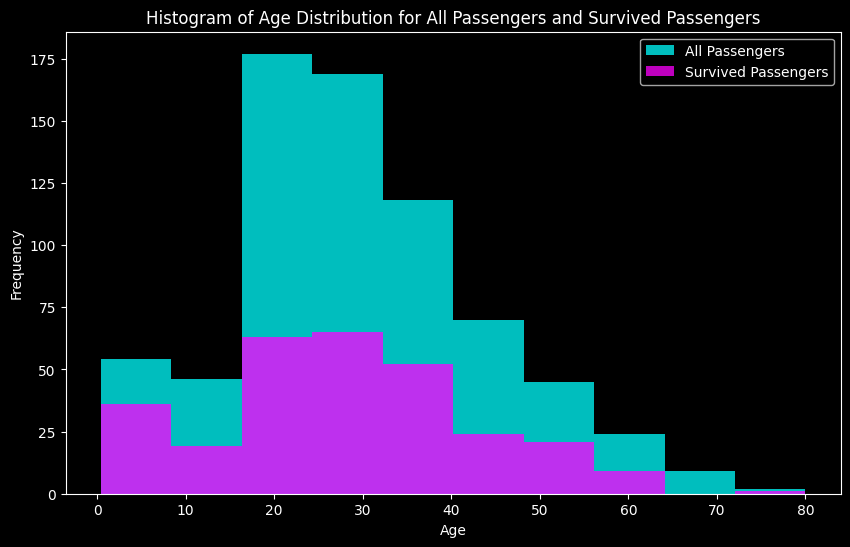


Summary statistics for the survived passengers:

mean                   28.343690
std                    14.950952
min                     0.420000
max                    80.000000
median                 28.000000
mode                   24.000000
25th percentile        19.000000
75th percentile        36.000000
Interquartile Range    17.000000
kurtosis               -0.057602
skewness                0.180458
Name: Age, dtype: float64

Observation:

         Both histograms show a relatively symmetrical distribution of passenger ages,
         
         with relatively more younger passengers compared to older passengers. This 

         sugests more younger passengers seem to have survived compared to older ones.

         The presence of one extreme outlier towards the right in the distribution of 
         
         ages among survivors suggests that there was at least one survivor who was 
         
         significantly older than the rest of the passengers. 
      


In [18]:
# Filter "Age" data for survived passengers
survived_age = df_titanic[df_titanic["Survived_label"] == "Survived"]["Age"]

# Calculate summary statistics for the survived passengers
summary_stats = survived_age.agg(["mean", "std", "min", "max", "median"])

# Calculate the mode for the survived passengers
mode_value = survived_age.mode().iloc[0]

# Append the mode value to the summary statistics DataFrame
summary_stats.loc["mode"] = mode_value

# Calculate quartiles
quartiles = survived_age.quantile([0.25, 0.75])

# Append quartiles to the summary statistics DataFrame
summary_stats.loc["25th percentile"] = quartiles.loc[0.25]
summary_stats.loc["75th percentile"] = quartiles.loc[0.75]

# Calculate the interquartile range (IQR)
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]

# Append the interquartile range to the summary statistics DataFrame
summary_stats.loc["Interquartile Range"] = IQR

# Calculate the kurtosis for the survived passengers
survived_kurtosis = survived_age.kurtosis()

# Append the kurtosis value to the summary statistics DataFrame
summary_stats.loc["kurtosis"] = survived_kurtosis

# Calculate the skewness for the survived passengers
survived_skewness = survived_age.skew()

# Append the skewness value to the summary statistics DataFrame
summary_stats.loc["skewness"] = survived_skewness

# Plot histogram for all passengers
data.hist(bins=10, color="cyan", alpha=0.75, label="All Passengers", figsize=(10, 6), grid=False)

# Plot histogram for survived passengers
survived_age.hist(bins=10, color="magenta", alpha=0.75, label="Survived Passengers", figsize=(10, 6), grid=False)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution for All Passengers and Survived Passengers")

# Add legend
plt.legend()

# Print a message indicating the purpose of the plot
print()
print("**********  A HISTOGRAM TO SHOW THE DISTRIBUTION OF PASSENGER AGES  **********")
print()

# Show the plot
plt.show()

# Print summary statistics for the survived passengers
print()
print("Summary statistics for the survived passengers:")
print()
print(summary_stats)

# Print a message indicating the observation made from analyzing the histogram
print()
print("Observation:")
print('''
         Both histograms show a relatively symmetrical distribution of passenger ages,
         
         with relatively more younger passengers compared to older passengers. This 

         sugests more younger passengers seem to have survived compared to older ones.

         The presence of one extreme outlier towards the right in the distribution of 
         
         ages among survivors suggests that there was at least one survivor who was 
         
         significantly older than the rest of the passengers. 
      ''')

Children have higher survival rate.

[Back to Top](#Table-of-Contents)
